In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import graphviz
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from MakeDataset import *

In [4]:
import numpy as np

XX_tr = np.sqrt(np.sum(X_train**2, axis=2))
XX_ts=np.sqrt(np.sum(X_test**2, axis=2))


In [5]:
print(XX_tr.shape)
print(XX_ts.shape)

(126, 500)
(54, 500)


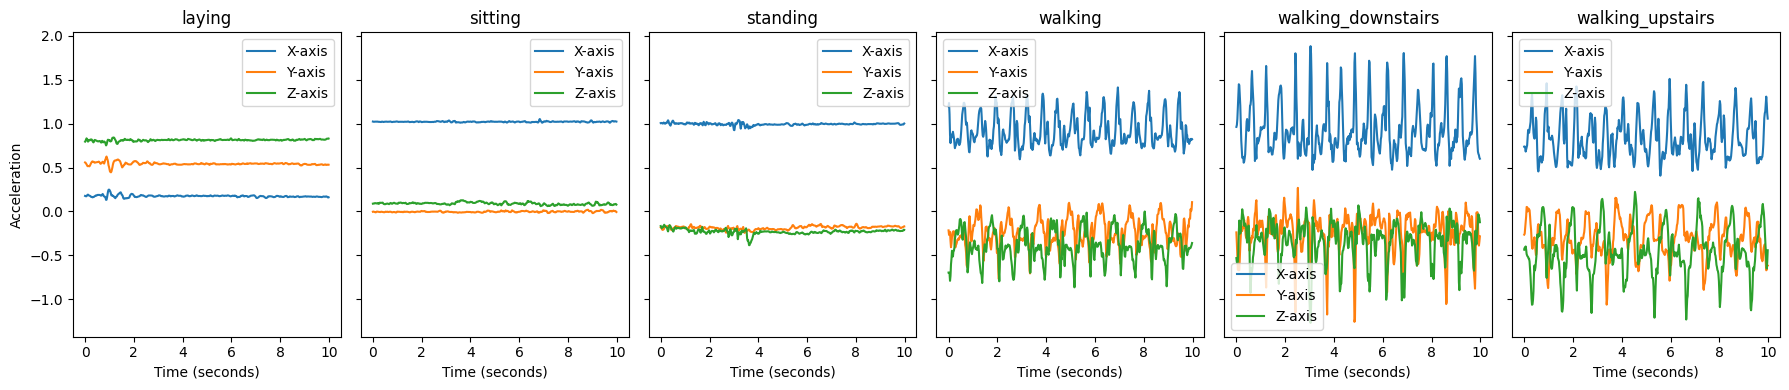

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionary to hold data
df = {}
activities = ['laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs']

# Load data for each activity into the dictionary
for activity in activities:
    df[activity] = pd.read_csv(f"data+scripts/Combined/Train/{activity.upper()}/Subject_14.csv")

# Create subplots to visualize waveforms
fig, axes = plt.subplots(1, 6, figsize=(18, 4), sharey=True)

# Define the number of samples to plot (corresponding to 10 seconds at 50Hz)
num_samples = 500
sampling_rate = 50  # 50Hz

for i, activity in enumerate(activities):
    # Extract the first 500 samples for each activity
    data = df[activity].iloc[:num_samples]
    # Extract x, y, z components
    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    z = data.iloc[:, 2]

    # Create time axis in seconds
    time = range(num_samples)  # 0 to 499 samples
    time_seconds = [t / sampling_rate for t in time]  # Convert samples to seconds

    # Plot the waveform for each activity
    axes[i].plot(time_seconds, x, label='X-axis')
    axes[i].plot(time_seconds, y, label='Y-axis')
    axes[i].plot(time_seconds, z, label='Z-axis')
    axes[i].set_title(activity)
    axes[i].set_xlabel('Time (seconds)')
    if i == 0:
        axes[i].set_ylabel('Acceleration')
    axes[i].legend()

plt.tight_layout()
plt.show()


By seeing the plot we can clearly differentiate between the dynamic activites and static activities, as the peaks in dynamic activities are more than peaks in static activities. And between laying,sitting and standing we can clearly see that acc_x in sittitng is higher than acc_y & acc_z compared to laying and standing. And the peaks of acc_x in walking downstairs is higher than peaks of walking and walking upstairs.

In [3]:
# Q2

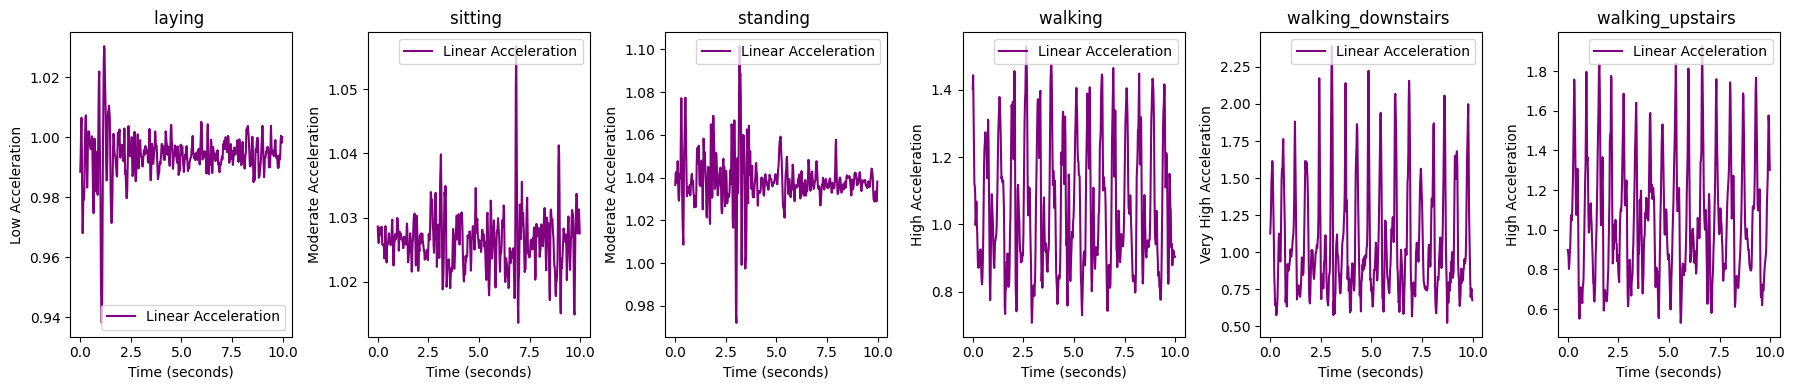

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionary to hold data
df = {}
activities = ['laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs']

# Load data for each activity into the dictionary
for activity in activities:
    df[activity] = pd.read_csv(f"data+scripts/Combined/Train/{activity.upper()}/Subject_14.csv")

# Create subplots to visualize linear acceleration waveforms
fig, axes = plt.subplots(1, 6, figsize=(18, 4), sharey=False)

# Define the number of samples to plot (corresponding to 10 seconds at 50Hz)
num_samples = 500
sampling_rate = 50  # 50Hz

# Define custom y-axis labels for each activity
y_labels = {
    'laying': 'Low Acceleration',
    'sitting': 'Moderate Acceleration',
    'standing': 'Moderate Acceleration',
    'walking': 'High Acceleration',
    'walking_downstairs': 'Very High Acceleration',
    'walking_upstairs': 'High Acceleration'
}

for i, activity in enumerate(activities):
    # Extract the first 500 samples for each activity
    data = df[activity].iloc[:num_samples]
    # Extract x, y, z components
    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    z = data.iloc[:, 2]

    # Create time axis in seconds
    time = range(num_samples)  # 0 to 499 samples
    time_seconds = [t / sampling_rate for t in time]  # Convert samples to seconds

    # Calculate linear acceleration magnitude
    linear_acceleration = np.sqrt(x**2 + y**2 + z**2)

    # Plot linear acceleration magnitude
    axes[i].plot(time_seconds, linear_acceleration, color='purple', label='Linear Acceleration')
    axes[i].set_title(f'{activity} ')
    axes[i].set_xlabel('Time (seconds)')
    
    # Set different y-axis labels based on activity
    axes[i].set_ylabel(y_labels[activity])

    axes[i].legend()

plt.tight_layout()
plt.show()


We can visually distinguish between static and dynamic activities by looking at the plot of their linear acceleration. This is by seeing the waveforms, the maximum and minimum values of acceleration of static and dynamic activities. Since by direct visualisation these activities can be differentiated so there is no must of using Machine Learning models. However we can us decision tree to differentiarte between them by differentiating based on their peak values.

In [3]:


# Define file paths
axes = ["x", "y", "z"]
file_paths = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_{axis}_train.txt" for axis in axes}

# Load data for each axis into a dictionary of DataFrames
dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}

# Compute the magnitude of acceleration
# Assuming each DataFrame has the same number of rows and columns
df_acc = pd.DataFrame()

# Calculate sqrt(x^2 + y^2 + z^2) for each row
df_acc = pd.DataFrame(np.sqrt(dfs['x']**2 + dfs['y']**2 + dfs['z']**2))

# Optionally, save to a CSV file
df_acc.to_csv("combined_total_acceleration.csv", index=False, header=False)

print("Data combined and saved to 'combined_total_acceleration.csv'.")


C:\Users\shash\AppData\Local\Temp\ipykernel_28988\302764530.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\302764530.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\302764530.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}


Data combined and saved to 'combined_total_acceleration.csv'.


C:\Users\shash\AppData\Local\Temp\ipykernel_28988\18090415.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\18090415.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\18090415.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\18090415.py:30: FutureWarning

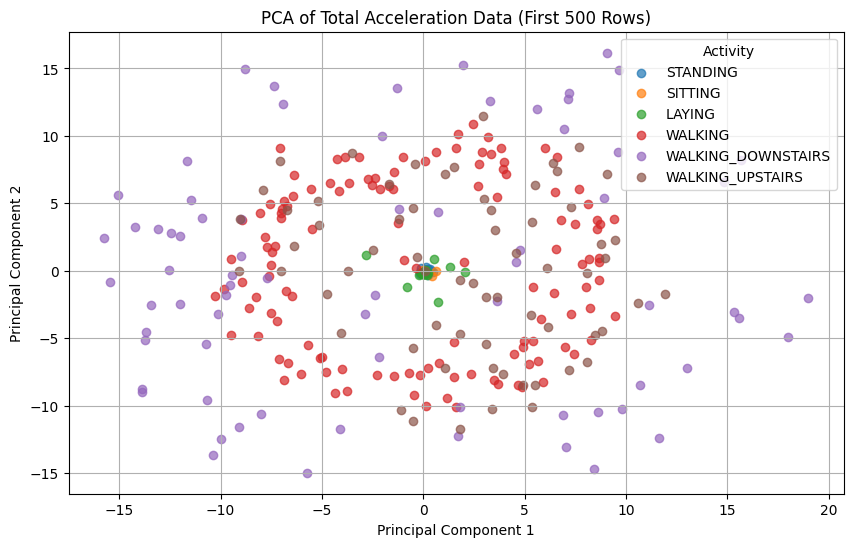

PCA results with classifications saved to 'pca_total_acceleration_with_labels.csv'.


In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define file paths
axes = ["x", "y", "z"]
file_paths = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_{axis}_train.txt" for axis in axes}
labels_path = "data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"  # Path to activity labels

# Load data for each axis into a dictionary of DataFrames
dfs = {axis: pd.read_csv(file_paths[axis], header=None, delim_whitespace=True) for axis in axes}

# Compute the magnitude of acceleration
df_acc = pd.DataFrame(np.sqrt(dfs['x']**2 + dfs['y']**2 + dfs['z']**2))

# Select the first 500 rows
df_acc_500 = df_acc.iloc[:500, :]

# Normalize the data
scaler = StandardScaler()
df_acc_500_normalized = scaler.fit_transform(df_acc_500)

# Apply PCA
pca = PCA(n_components=2)
df_acc_pca = pca.fit_transform(df_acc_500_normalized)

# Load the activity labels
y_train = pd.read_csv(labels_path, header=None, delim_whitespace=True)

# Select the first 500 labels
y_train_500 = y_train.iloc[:500, 0]

# Create a DataFrame for PCA results and add the activity labels
df_pca = pd.DataFrame(df_acc_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Activity'] = y_train_500.values

# Define activity names (optional)
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Replace activity numbers with their corresponding labels (optional)
df_pca['Activity'] = df_pca['Activity'].map(activity_labels)

# Plotting the PCA results with classifications
plt.figure(figsize=(10, 6))

# Create a scatter plot, with each class in a different color
for activity in df_pca['Activity'].unique():
    subset = df_pca[df_pca['Activity'] == activity]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=activity, alpha=0.7)

plt.title('PCA of Total Acceleration Data (First 500 Rows)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Activity")
plt.grid(True)
plt.show()

# Optionally save PCA results to a CSV file
df_pca.to_csv("pca_total_acceleration_with_labels.csv", index=False)
print("PCA results with classifications saved to 'pca_total_acceleration_with_labels.csv'.")


In [8]:
import tsfel
import pandas as pd
from joblib import Parallel, delayed
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# Load the labels for training and testing data
y_train = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
y_test = pd.read_csv("data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

# Load and compute the magnitude of acceleration for training data
axes = ["x", "y", "z"]
file_paths_train = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_{axis}_train.txt" for axis in axes}
dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
df_train_acc = pd.DataFrame(np.sqrt(dfs_train['x']**2 + dfs_train['y']**2 + dfs_train['z']**2))

# Load and compute the magnitude of acceleration for testing data
file_paths_test = {axis: f"data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_{axis}_test.txt" for axis in axes}
dfs_test = {axis: pd.read_csv(file_paths_test[axis], header=None, delim_whitespace=True) for axis in axes}
df_test_acc = pd.DataFrame(np.sqrt(dfs_test['x']**2 + dfs_test['y']**2 + dfs_test['z']**2))

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

# Function to extract features for a single time series instance
def extract_features_for_instance(row):
    return tsfel.time_series_features_extractor(cfg, row)

# Parallel processing: Extract features for each row in parallel
tsfel_train_x = pd.concat(Parallel(n_jobs=-1)(delayed(extract_features_for_instance)(df_train_acc.iloc[i, :]) for i in range(len(df_train_acc))), ignore_index=True)
tsfel_test_x = pd.concat(Parallel(n_jobs=-1)(delayed(extract_features_for_instance)(df_test_acc.iloc[i, :]) for i in range(len(df_test_acc))), ignore_index=True)

# Combine original and TSFEL features
combined_train_x = pd.concat([df_train_acc, tsfel_train_x], axis=1)
combined_test_x = pd.concat([df_test_acc, tsfel_test_x], axis=1)

# Convert all column names to strings to avoid TypeError
combined_train_x.columns = combined_train_x.columns.astype(str)
combined_test_x.columns = combined_test_x.columns.astype(str)



C:\Users\shash\AppData\Local\Temp\ipykernel_28988\6886226.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\6886226.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28988\6886226.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfs_train = {axis: pd.read_csv(file_paths_train[axis], header=None, delim_whitespace=True) for axis in axes}
C:\Users\shash\AppData\Local\Temp\ipykernel_28

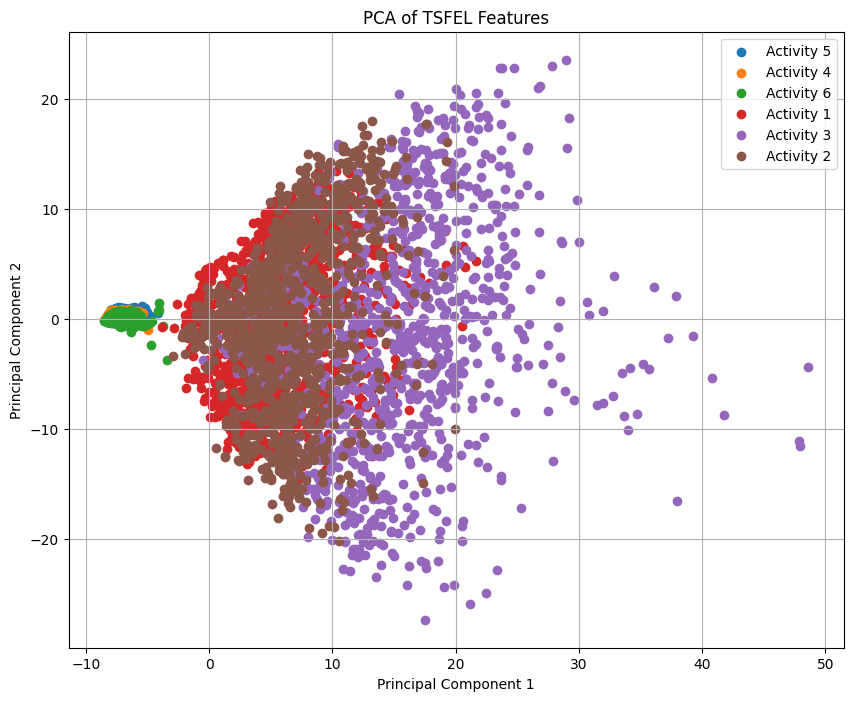

In [9]:
import tsfel
import pandas as pd
from joblib import Parallel, delayed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Standardize features before applying PCA
scaler = StandardScaler()
combined_train_x_scaled = scaler.fit_transform(combined_train_x)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_train_x_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Activity'] = y_train

# Plotting
plt.figure(figsize=(10, 8))
for activity in pca_df['Activity'].unique():
    subset = pca_df[pca_df['Activity'] == activity]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Activity {activity}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of TSFEL Features')
plt.legend()
plt.grid(True)
plt.show()


Explained variance ratio: [0.50781172 0.0658068 ]


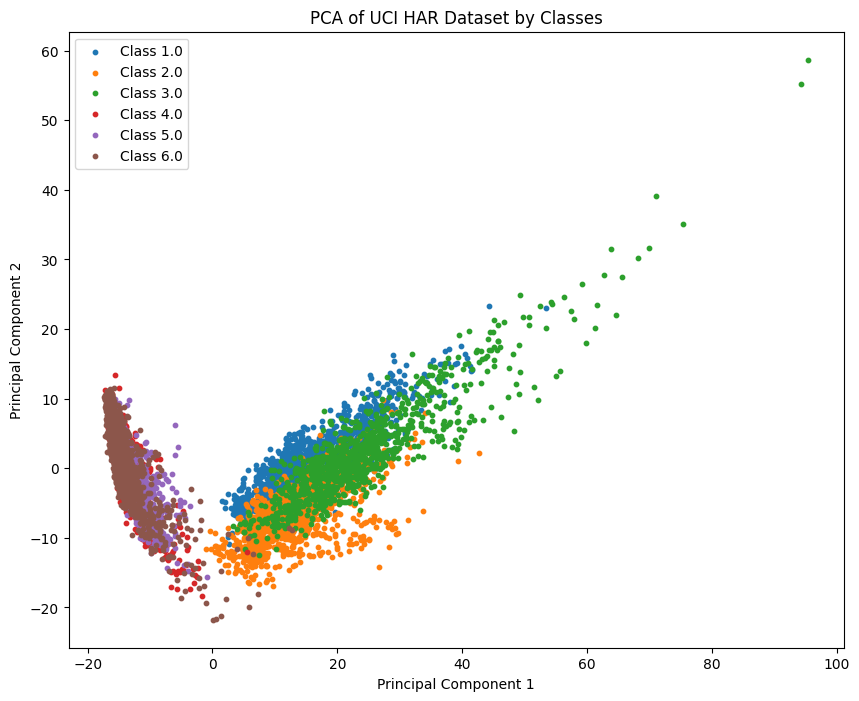

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual file paths)
X_train = np.loadtxt('data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt')  # Replace with actual path
y_train = np.loadtxt('data+scripts/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt') 

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_train_scaled)

# Print explained variance ratio to understand how much variance is captured by the two components
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Get the unique classes (activities or subjects)
classes = np.unique(y_train)

# Create a scatter plot with different colors for each class
plt.figure(figsize=(10, 8))
for class_label in classes:
    plt.scatter(
        X_pca[y_train == class_label, 0], 
        X_pca[y_train == class_label, 1], 
        label=f'Class {class_label}', 
        s=10  # Customize marker size
    )

plt.title('PCA of UCI HAR Dataset by Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()  # Show a legend to differentiate classes
plt.show()


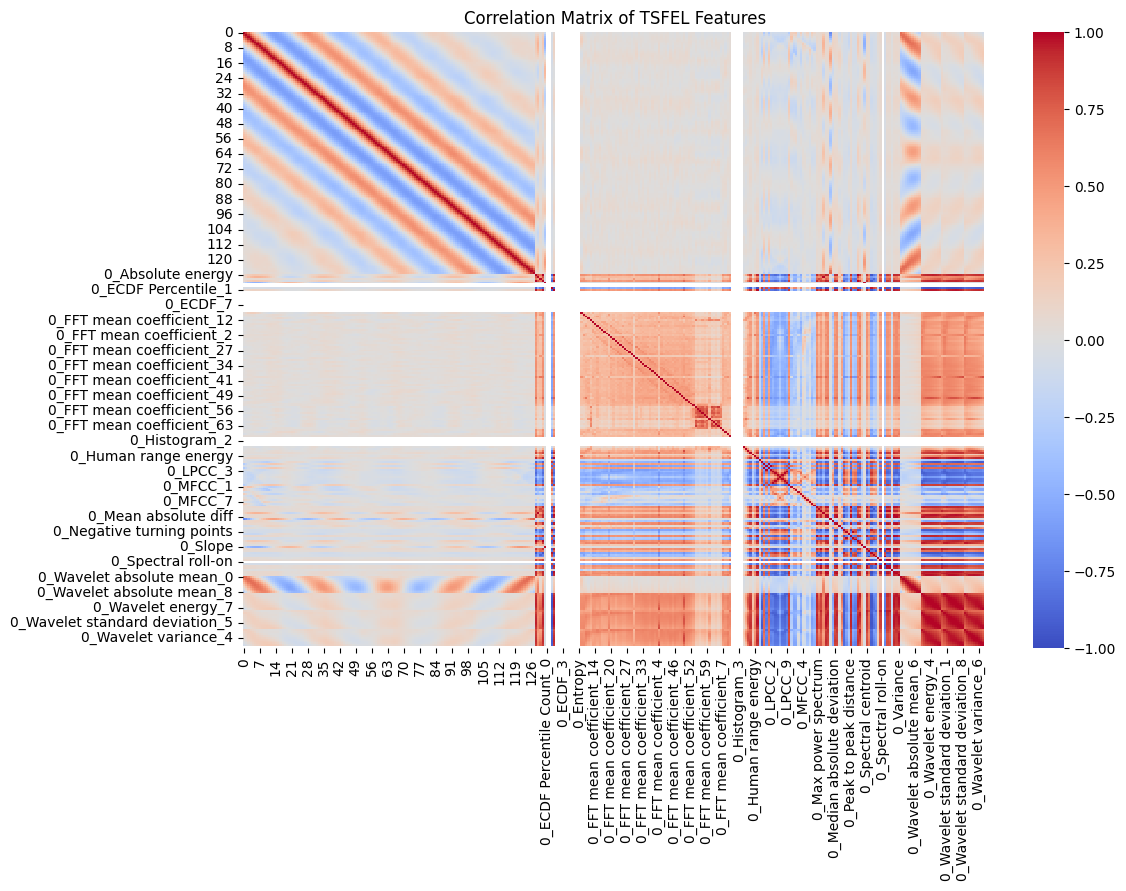

Highly correlated feature pairs:
0 and 1: correlation = 0.91
1 and 2: correlation = 0.91
2 and 3: correlation = 0.91
3 and 4: correlation = 0.91
4 and 5: correlation = 0.91
5 and 6: correlation = 0.92
6 and 7: correlation = 0.92
7 and 8: correlation = 0.91
8 and 9: correlation = 0.91
9 and 10: correlation = 0.91
10 and 11: correlation = 0.91
11 and 12: correlation = 0.91
12 and 13: correlation = 0.92
13 and 14: correlation = 0.92
14 and 15: correlation = 0.91
15 and 16: correlation = 0.91
16 and 17: correlation = 0.91
17 and 18: correlation = 0.91
18 and 19: correlation = 0.91
19 and 20: correlation = 0.92
20 and 21: correlation = 0.92
21 and 22: correlation = 0.91
22 and 23: correlation = 0.91
23 and 24: correlation = 0.92
24 and 25: correlation = 0.92
25 and 26: correlation = 0.91
26 and 27: correlation = 0.91
27 and 28: correlation = 0.91
28 and 29: correlation = 0.92
29 and 30: correlation = 0.91
30 and 31: correlation = 0.92
31 and 32: correlation = 0.92
32 and 33: correlation = 0

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_tsfel is the DataFrame containing TSFEL-generated features

# Calculate correlation matrix
corr_matrix = combined_train_x.corr()

# Plot the heatmap of the correlation matrix for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TSFEL Features')
plt.show()

# Identify features that are highly correlated (threshold 0.9)
threshold = 0.9
high_corr_pairs = [(i, j, corr_matrix.iloc[i, j]) for i in range(len(corr_matrix.columns)) 
                   for j in range(i+1, len(corr_matrix.columns)) 
                   if abs(corr_matrix.iloc[i, j]) > threshold]

# Print highly correlated feature pairs
print("Highly correlated feature pairs:")
for i, j, corr_value in high_corr_pairs:
    print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: correlation = {corr_value:.2f}")

# Optionally, list redundant features based on high correlation
redundant_features = set([corr_matrix.columns[i] for i, j, _ in high_corr_pairs])

print("\nRedundant features:")
print(redundant_features)
